In [2]:
from stingray import Lightcurve
from stingray import Crossspectrum, AveragedCrossspectrum
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
## Shows the plots inline, instead of in a separate window:
%matplotlib inline
## Sets the font size for plotting
font_prop = font_manager.FontProperties(size=18)

data_file = "/Users/abigailstevens/Reduced_data/GX339-BQPO/95409-01-18-00/GTId_eventlist.fits"
try:
    fits_hdu = fits.open(data_file)
except IOError:
    print("\tERROR: File does not exist: %s" % data_file)

header = fits_hdu[0].header	 ## Header info is in ext 0, data is in ext 1
data = fits_hdu[1].data
fits_hdu.close()


In [3]:
dt = 64/8192.
t_seg = 64
chan3_mask = data.field('CHANNEL') == 3
data_chan3 = data[chan3_mask]
time_ci = np.asarray(data_chan3.field('TIME'), dtype=np.float64)
chan5_mask = data.field('CHANNEL') == 5
data_chan5 = data[chan5_mask]
time_ref = np.asarray(data_chan5.field('TIME'), dtype=np.float64)
start_time = np.max([time_ci[0], time_ref[0]])
seg_end_time = start_time + t_seg
final_time = np.min([time_ci[-1], time_ref[-1]])

lc_ci, lc_ref = [], []
while seg_end_time <= final_time:
    lc_1 = Lightcurve.make_lightcurve(time_ci, dt, tseg=t_seg, tstart=start_time)
    lc_2 = Lightcurve.make_lightcurve(time_ref, dt, tseg=t_seg, tstart=start_time)
    lc_ci.append(lc_1)
    lc_ref.append(lc_2)
    start_time += t_seg
    seg_end_time += t_seg
# cross = Crossspectrum(lc_1=lc_1, lc_2=lc_2, norm='leahy')
cross = AveragedCrossspectrum(lc_1=lc_ci, lc_2=lc_ref, segment_size=t_seg, norm='leahy')

In [6]:
dee_eff = cross.df
print dee_eff
cross = cross.rebin(df=3.0*dee_eff)
print cross.df

0.03125
0.09375


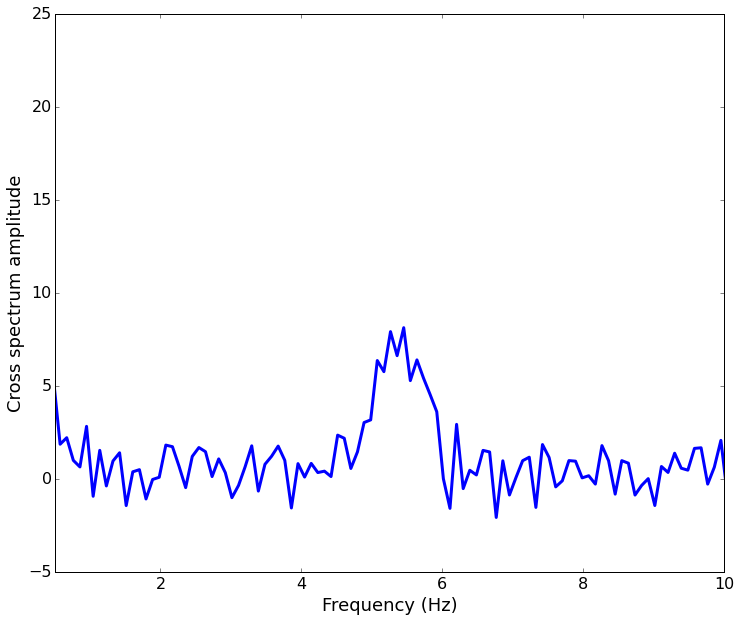

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,10), dpi=300)
ax.plot(cross.freq[1:], cross.cs.real[1:], linewidth=3.0)
ax.set_xlabel('Frequency (Hz)', fontproperties=font_prop)
ax.set_ylabel('Cross spectrum amplitude', fontproperties=font_prop)
ax.set_xlim(0.5, 10)
# ax.set_ylim(0, 3)
ax.tick_params(axis='x', labelsize=16, bottom=True, top=True, labelbottom=True, labeltop=False)
ax.tick_params(axis='y', labelsize=16, left=True, right=True, labelleft=True, labelright=False)
plt.show()